### 2016 November is the month where US presidency election took place between Trump and Hilary. This analysis focus on the stand of NYTimes towards each contestants, by analysing the kind of articles published in their newspaper.

Key analysis:
- Conducting sentimental analyis on the articles published during the election month,November 2016
- Only considering articles focussing on a contestant directly
- Analysing on which months a contestant was favored by counting the frequency of neutral or positive articles.
- Graphical representation of results

In [130]:
import nltk, requests, configparser, os, sys, json, glob, datetime, time, email, matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

config = configparser.ConfigParser()
config.readfp(open(r'archive-config.txt'))

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.


In [127]:
sid = SentimentIntensityAnalyzer()
def analyse(statement):
    ss = sid.polarity_scores(statement)
    return ss
    #for k in sorted(ss):
    #    print('{0}: {1}, '.format(k, ss[k]), end='')

In [128]:
try: 
    uri_path_list = []

    for link in config['uri']:
        uri_path_list.append(config.get('uri',link))
        break;
    directory = config.get('directory_path','directory')
    sub_directory = config.get('directory_path','sub_directory')    

    for param in config['parameters']:
        #print(param)
        uri_path_list.append('/'+config.get('parameters',param))
    uri_path_list.append('.json')    
    
    for key in config['api_key']:
        uri_path_list.append('?api_key='+config.get('api_key',key))
        break;                

    uri_path = ''.join(uri_path_list);
    #print(uri_path)
    
    resp = requests.get(uri_path)
    request_data = (resp).json();  
    if 'errors' in request_data.keys():
        raise Exception(request_data['errors'])
    elif 'message' in request_data.keys():
        raise Exception(request_data['message'])

    #print(directory)
    if not os.path.exists(directory):
        os.makedirs(directory)

    if not os.path.exists(directory+'\\'+sub_directory):
        os.makedirs(directory+'\\'+sub_directory)
        
    #print('Starting to store json files for sports.')    
    #print(request_data)
    #print(request_data.keys())
    
    section = []

    try:
        if( 'response' in request_data.keys() ):
            response = request_data['response']
            if( 'docs' in response.keys() ):
                docs = response['docs']        
                for doc in docs:
                    if( 'section_name' in doc.keys() ):
                        sname = doc['section_name']
                        if sname not in section:
                            section.append(sname)
                        if sname == 'U.S.':
                            #if( 'section_name' in doc.keys() ):
                            #print(doc['headline']['main']+' = '+doc['pub_date'])
                            us_path = directory+'\\'+sub_directory+'\\US';
                            if not os.path.exists(us_path):
                                os.makedirs(us_path)
                            if( '_id' in doc.keys() ):
                                file_path = us_path+'\\'+doc.get('_id')+".json"
                                if not os.path.exists(file_path):
                                    #print(doc['headline']['main']+' = '+doc['pub_date'])
                                    with open(file_path, "w") as outfile:
                                        json.dump(doc, outfile, indent=4)
                                #else:
                                    #print(doc['headline']['main']+' = '+doc['pub_date']+' exists')
    
    except ValueError:
        print("error :", sys.exc_info()[0])
    print('Storing json files for sports completed.')
except Exception as error:
    print('Caught this error: ' + repr(error))

Storing json files for sports completed.


Analysing the data...

Article analysis for month of November.

30 articles published against Hilary
16 articles published for Hilary

150 articles published against Trump
52 articles published for Trump

Graphical representation of articles against Hilary towards election
[2, 1, 7, 3, 6, 2, 3, 2, 1, 1, 1, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 18, 22]


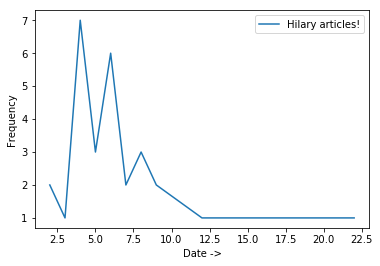

Graphical representation of articles against Trump towards election
[4, 2, 1, 2, 2, 2, 3, 11, 11, 9, 13, 4, 9, 5, 7, 8, 6, 9, 2, 3, 8, 8, 5, 1, 2, 4, 8, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30]


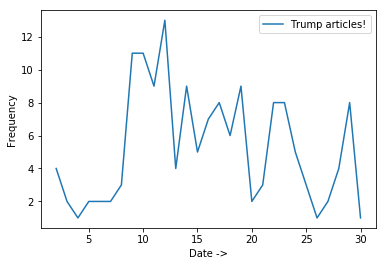

Plotting data completed.


In [129]:
import datetime, time, email

directory = config.get('directory_path','directory')
sub_directory = config.get('directory_path','sub_directory')    
search_path = directory+'/'+sub_directory+'/US/'

election_results = dict()
monthly_results = dict()
total_article_count = 0;
parameters = ['for','against']

trump = 'Trump'
hilary = 'Hilary'
try:
    for file in glob.glob(search_path+'*.json'):
        with open(file, 'r') as f:
            data = json.load(f)

            article_date = data['pub_date']
            parse_date = datetime.datetime.strptime(article_date[:10], "%Y-%m-%d")
            date_entry = parse_date
            #date_entry = parse_date.strftime("%B")+'-'+parse_date.strftime("%Y")
            #print(date_entry)

            #condition
            if(parse_date > datetime.datetime(2016,11,1) and parse_date < datetime.datetime(2016,12,10)): 

                if 'headline' in data.keys() and 'main' in data['headline']:
                    headline = data['headline']['main']

                    #if 'trump' in headline.lower() and 'clinton' in headline.lower():
                    #    print(headline.lower())
                    #elif 'trump' in headline.lower():
                    #    //trump
                    #elif 'hilary' in headline.lower():    
                    #    //hilary
                    if 'hilary' in headline.lower() or 'clinton' in headline.lower():
                        result = analyse(headline)
                        neg = result['neg']
                        pos = result['pos']
                        #print(result)
                        if pos > neg:
                            if hilary in election_results.keys():
                                hobject = election_results[hilary]
                                if parameters[0] in hobject.keys():
                                    election_results[hilary][parameters[0]] += 1
                                else:
                                    election_results[hilary][parameters[0]] = 1
                            else:
                                election_results[hilary] = dict()
                                election_results[hilary][parameters[0]] = 1

                        else:
                            if hilary in election_results.keys():
                                hobject = election_results[hilary]
                                if parameters[1] in hobject.keys():
                                    election_results[hilary][parameters[1]] += 1
                                else:
                                    election_results[hilary][parameters[1]] = 1
                            else:
                                election_results[hilary] = dict()
                                election_results[hilary][parameters[1]] = 1
                            
                            #date entry for negative articles only
                            if date_entry in monthly_results.keys():
                                contestants = monthly_results[date_entry]
                                if hilary in contestants.keys():
                                    contestants[hilary] += 1
                                else:
                                    contestants[hilary] = 1
                            else:
                                monthly_results[date_entry] = dict()
                                monthly_results[date_entry][hilary] = 1

                    elif 'trump' in headline.lower() or 'donald' in headline.lower():
                        #print(headline)
                        result = analyse(headline)
                        neg = result['neg']
                        pos = result['pos']
                        #print(result)

                        if pos > neg:
                            #print(headline.lower())
                            if trump in election_results.keys():
                                hobject = election_results[trump]
                                if parameters[0] in hobject.keys():
                                    election_results[trump][parameters[0]] += 1
                                else:
                                    election_results[trump][parameters[0]] = 1
                            else:
                                election_results[trump] = dict()
                                election_results[trump][parameters[0]] = 1
                        else:
                            if trump in election_results.keys():
                                hobject = election_results[trump]
                                if 'against' in hobject.keys():
                                    election_results[trump][parameters[1]] += 1
                                else:
                                    election_results[trump][parameters[1]] = 1
                            else:
                                election_results[trump] = dict()
                                election_results[trump][parameters[1]] = 1
                                
                            #date entry for negative articles only
                            if date_entry in monthly_results.keys():
                                contestants = monthly_results[date_entry]
                                if trump in contestants.keys():
                                    contestants[trump] += 1
                                else:
                                    contestants[trump] = 1
                            else:
                                monthly_results[date_entry] = dict()
                                monthly_results[date_entry][trump] = 1
except Exception as error:
    print('Caught this error: ' + repr(error))

#print(election_results) 
print("Article analysis for month of November.")
for contestant,res in election_results.items():
    print()
    for r,v in res.items():
        w = ("{0} articles published {1} {2}").format(v,r,contestant)
        print(w)

print()
#print(monthly_results) 
hilary_freq = []
hilary_date_list = [];
trump_freq = []
trump_date_list = [];

for adate,contestants in monthly_results.items():
    for cont,count in contestants.items():
        if cont == hilary:
            hilary_date_list.append(int(adate.strftime("%d")))
            hilary_freq.append(count)
            #print(str(count)+" - "+cont)
        else:
            trump_date_list.append(int(adate.strftime("%d")))
            trump_freq.append(count)


import matplotlib.pyplot as plt

print("Graphical representation of articles against Hilary towards election")
print(hilary_freq)
print(hilary_date_list)
plt.plot(hilary_date_list,hilary_freq, label='Hilary articles!')
plt.xlabel('Date ->')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Graphical representation of articles against Trump towards election")
print(trump_freq)
print(trump_date_list)
plt.plot(trump_date_list,trump_freq, label='Trump articles!')
plt.xlabel('Date ->')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print('Plotting data completed.')